## Predicting Porosity using various machine learning algorithms

by: Jeremiah Chinyelugo

## BRIEF INTRODUCTION

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

#### Importing the algorithms

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
import time

#### Loading the data

In [3]:
df = pd.read_csv('log.csv')
df.head()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


Depth of well with every 0.5 m reading

RxoRt
Ratio of Shallow and deep resistivity in well

RLL3
Laterlog 3 data

SP
spontaneous data

RILD
Deep Induction resistivity data

MN
Resistivity wide array

MI
Resistivity Intermediate Array

MCAL
Normal caliper, which show the size of well

DCAL
Differential Caliper

RHOB
Bulk density data

RHOC
Corrected bulk density

CNL
Compensated Neutron Log

GR
Gamma Ray


Checking if we have null values and desription of our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8739 non-null   float64
 1   RxoRt   8739 non-null   float64
 2   RLL3    8739 non-null   float64
 3   SP      8739 non-null   float64
 4   RILD    8739 non-null   float64
 5   MN      8739 non-null   float64
 6   MI      8739 non-null   float64
 7   MCAL    8739 non-null   float64
 8   DCAL    8739 non-null   float64
 9   RHOB    8739 non-null   float64
 10  RHOC    8739 non-null   float64
 11  DPOR    8739 non-null   float64
 12  CNLS    8739 non-null   float64
 13  GR      8739 non-null   float64
dtypes: float64(14)
memory usage: 956.0 KB


In [5]:
df.describe()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
count,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.00000,8739.000000,8739.0000,8739.000000,8739.000000
mean,2535.727372,-18.493591,37.948919,-94.299762,34.511874,11.714442,12.180632,5.906369,3.669944,2.03364,0.126320,39.5532,20.129247,76.948923
std,1358.246302,31.420924,81.734581,39.652558,251.238360,27.537012,28.874862,1.305561,2.748873,0.41571,0.103907,24.3105,11.427909,33.859411
min,195.000000,-150.821900,0.389900,-201.623000,0.210400,-0.527400,-0.673500,5.047400,1.885300,1.19050,-0.670500,-1.8873,-0.513900,0.005800
25%,1292.250000,-31.993950,6.430800,-131.421100,4.356500,0.306700,0.097650,5.089800,1.919350,1.68905,0.049600,14.8416,8.888250,52.336950
50%,2623.500000,-16.509300,12.138400,-95.587500,7.822900,0.970300,0.361700,5.098500,1.977500,2.00030,0.109800,41.5051,21.053800,77.034000
75%,3715.750000,-5.941450,25.696300,-58.054000,19.486800,7.978100,7.307150,7.764550,7.850000,2.45620,0.210100,59.7036,29.544100,96.306700
max,4808.000000,247.583200,880.859400,69.895300,11510.641600,252.124200,234.871500,10.308600,12.334900,2.74230,0.357500,88.8601,47.581000,404.288100


### Dropping Useless features

before we delete the depth feature from the dataframe, we need to store it in a list, for plotting later on.

In [6]:
depth = df['Depth'].tolist()

df = df.drop(['Depth', 'MCAL', 'DCAL', 'RHOC', 'RLL3'], axis=1)
df.head()

,RxoRt,SP,RILD,MN,MI,RHOB,DPOR,CNLS,GR
0,226.0848,69.8953,132.5052,-0.3548,0.1863,1.6973,59.2216,30.0657,60.4576
1,223.5031,69.2303,123.6225,-0.3619,0.1867,1.6791,60.2877,26.7625,54.1495
2,221.4560,68.4478,116.9258,-0.3668,0.1860,1.6585,61.4914,27.6017,51.9944
3,219.8248,67.4843,111.7925,-0.3613,0.1867,1.6435,62.3711,31.5870,52.9645
4,218.1438,66.3013,106.7821,-0.3569,0.1870,1.6390,62.6343,35.8251,54.9659


The next step will be to check if any of the variables are strongly correlated with each other (excluding `DPOR`), i.e >= abs(0.7), and if we find any we need to get rid of them.

In [7]:
df.corr()

,RxoRt,SP,RILD,MN,MI,RHOB,DPOR,CNLS,GR
RxoRt,1.000000,-0.082923,0.332368,-0.284875,-0.275306,-0.301102,0.301101,0.299788,0.108643
SP,-0.082923,1.000000,-0.084565,-0.007805,0.010777,0.136653,-0.136652,-0.356853,-0.024958
RILD,0.332368,-0.084565,1.000000,0.056329,0.052019,-0.052133,0.052133,-0.068656,-0.081979
MN,-0.284875,-0.007805,0.056329,1.000000,0.975974,0.554683,-0.554683,-0.474710,-0.159791
MI,-0.275306,0.010777,0.052019,0.975974,1.000000,0.562417,-0.562416,-0.468130,-0.129684
RHOB,-0.301102,0.136653,-0.052133,0.554683,0.562417,1.000000,-1.000000,-0.438707,-0.127397
DPOR,0.301101,-0.136652,0.052133,-0.554683,-0.562416,-1.000000,1.000000,0.438707,0.127396
CNLS,0.299788,-0.356853,-0.068656,-0.474710,-0.468130,-0.438707,0.438707,1.000000,0.400711
GR,0.108643,-0.024958,-0.081979,-0.159791,-0.129684,-0.127397,0.127396,0.400711,1.000000


**`MN`**and **`MI`** are strongly correlated, indicating multicollinearity, so we need to drop one of them because it does not add additional information, and it can lead to an unstable model.

In [8]:
df.drop(['MN'], axis=1, inplace=True)
df.head()

,RxoRt,SP,RILD,MI,RHOB,DPOR,CNLS,GR
0,226.0848,69.8953,132.5052,0.1863,1.6973,59.2216,30.0657,60.4576
1,223.5031,69.2303,123.6225,0.1867,1.6791,60.2877,26.7625,54.1495
2,221.4560,68.4478,116.9258,0.1860,1.6585,61.4914,27.6017,51.9944
3,219.8248,67.4843,111.7925,0.1867,1.6435,62.3711,31.5870,52.9645
4,218.1438,66.3013,106.7821,0.1870,1.6390,62.6343,35.8251,54.9659


We are going to check how correlated each of the features are to our target variable **`DPOR`** using Pearson and Spearman correlation methods. This can be done easily by using `corr()` method and specifying the exact correlation method.

The main difference between both correlation coefficients is that Pearson works well with linear relationship, where the rate of increase/decrease is constant, whereas Spearman works well with monotonic variables, where rate of increas/decrease is not constant.

In [9]:
df.corr(method='pearson')['DPOR'].sort_values()

RHOB    -1.000000
MI      -0.562416
SP      -0.136652
RILD     0.052133
GR       0.127396
RxoRt    0.301101
CNLS     0.438707
DPOR     1.000000
Name: DPOR, dtype: float64

In [10]:
df.corr(method='spearman')['DPOR'].sort_values()

RHOB    -1.000000
MI      -0.636051
RILD    -0.368619
SP      -0.151556
GR       0.184892
RxoRt    0.298296
CNLS     0.434304
DPOR     1.000000
Name: DPOR, dtype: float64

`RHOB` and `DPOR` are perfectly correlated, meaning `DPOR` can be predicted using only `RHOB`. The purpose of this notebook is to determine if we can predict porosity using various well logs, and having bulk density defeats this purpose. So we will drop `RHOB` and see how well our models perform using the remaining variables/features.

In [11]:
df.drop(['RHOB'], axis=1, inplace=True)
df.head()

,RxoRt,SP,RILD,MI,DPOR,CNLS,GR
0,226.0848,69.8953,132.5052,0.1863,59.2216,30.0657,60.4576
1,223.5031,69.2303,123.6225,0.1867,60.2877,26.7625,54.1495
2,221.4560,68.4478,116.9258,0.1860,61.4914,27.6017,51.9944
3,219.8248,67.4843,111.7925,0.1867,62.3711,31.5870,52.9645
4,218.1438,66.3013,106.7821,0.1870,62.6343,35.8251,54.9659


We are going to visualize our variables using a kernel density plot which shows the distribution of values in our dataset. This helps us understand the skewness of our dataset.

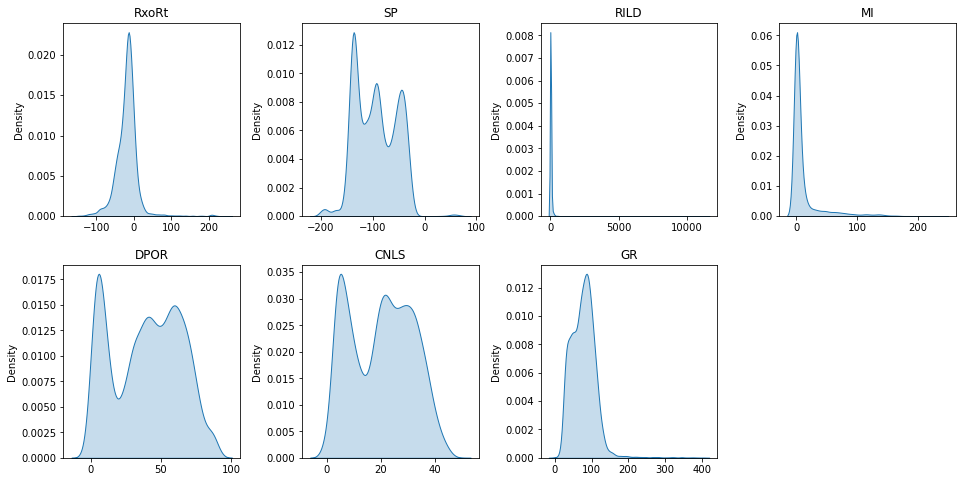

In [12]:
plt.figure(figsize=(16,8))

for i in range(7):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[df.columns[i]], shade=True)
    plt.title(df.columns[i])
    plt.xlabel('')
plt.subplots_adjust(hspace=0.25, wspace=0.35)

From the plots above, we can see some of our features follow a normal distribution although skewed.

#### Well Log Plots

We will visualize our well log data to see trend with depth

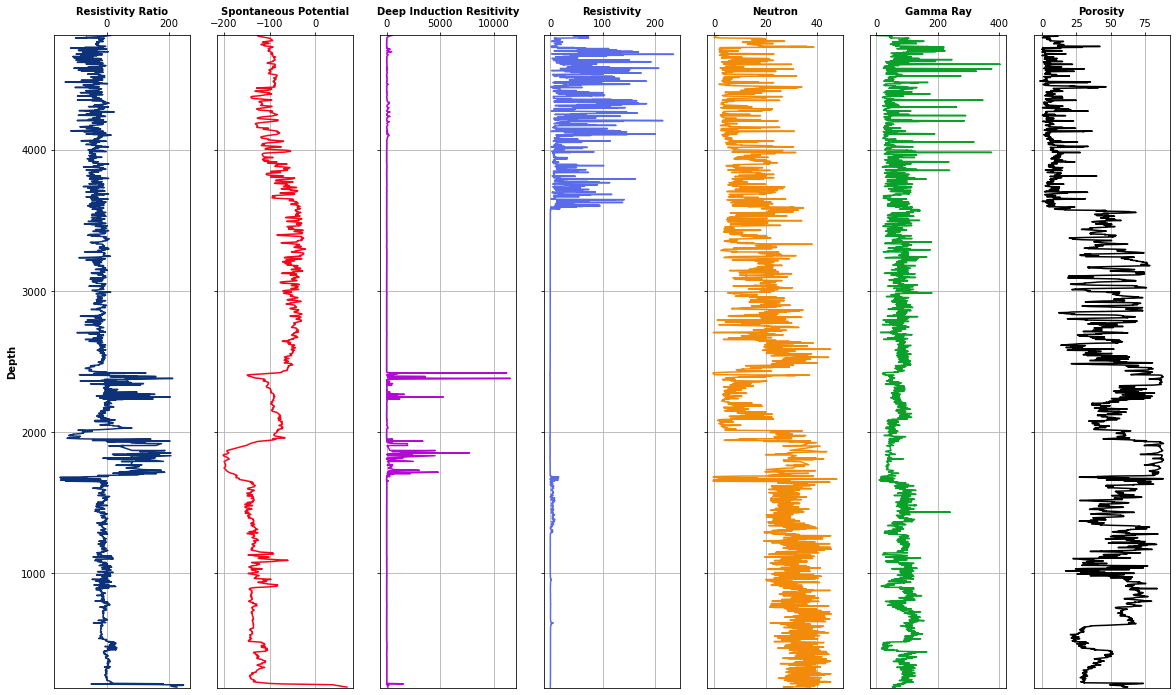

In [13]:
fig, ax = plt.subplots(1, 7, figsize=(20,12), sharey=True)

ax[0].plot(df['RxoRt'], depth, color='#0D3279')
ax[0].set_xlabel('Resistivity Ratio', weight='bold')
ax[0].set_ylabel('Depth', weight='bold')
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')
ax[0].grid()

ax[1].plot(df['SP'], depth, color='#F4071B')
ax[1].set_xlabel('Spontaneous Potential', weight='bold')
ax[1].xaxis.tick_top()
ax[1].xaxis.set_label_position('top')
ax[1].grid()

ax[2].plot(df['RILD'], depth, color='#B409D5')
ax[2].set_xlabel('Deep Induction Resitivity', weight='bold')
ax[2].xaxis.tick_top()
ax[2].xaxis.set_label_position('top')
ax[2].grid()

ax[3].plot(df['MI'], depth, color='#5A6CEA')
ax[3].set_xlabel('Resistivity', weight='bold')
ax[3].xaxis.tick_top()
ax[3].xaxis.set_label_position('top')
ax[3].grid()

ax[4].plot(df['CNLS'], depth, color='#F28B09')
ax[4].set_xlabel('Neutron', weight='bold')
ax[4].xaxis.tick_top()
ax[4].xaxis.set_label_position('top')
ax[4].grid()

ax[5].plot(df['GR'], depth, color='#0BA02A')
ax[5].set_xlabel('Gamma Ray', weight='bold')
ax[5].xaxis.tick_top()
ax[5].xaxis.set_label_position('top')
ax[5].grid()

ax[6].plot(df['DPOR'], depth, color='#000000')
ax[6].set_xlabel('Porosity', weight='bold')
ax[6].xaxis.tick_top()
ax[6].xaxis.set_label_position('top')
ax[6].grid()

plt.ylim([190,4808])
plt.show()

### Preprocessing

Data preprocessing is arguably the most important step in any machine learning project. Before building a machine learning model, you need to determine what you need your model to do. For this project, we are trying to predict porosity by using various well log data, therefore our final model should be able to predict porosity based on given petrophysical data. For our model to perform well, i.e genaralize, when put in use, we need to shuffle our data to prevent any bias that might be formed or pattern noticed by the model during the training phase. Shuffling the data reduces overfitting and variance and sometimes can help training converge faster.

If we were predicting sequential data, i.e time series, like oil production forecasting, then we do not need to suffle our data because we want whatever algorithm we will use to notice any trend or pattern in our data. Find out more in the other notebook.

##### Separating our data

Before we begin, we need to separate our dataset in features and targets

In [14]:
X, y = df.drop('DPOR', axis=1), df['DPOR']

In [15]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Next, we need to standardize our training data because our features have different ranges e.g, `MI` and `RxoRt`. Standardization makes all features/variables contribute equally, without doing this, models that are based on distance computation will find it difficult to understand the data.

Standardization is done by subtracting the mean and dividing by the standard devaition of each feature

Z = $\frac{value\space -\space mean}{standard\space deviation}$

In [16]:
# Scaling our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(5898, 6) (5898,)
(1967, 6) (1967,)
(874, 6) (874,)


Next we will train our mmodel usisng the base parameters. 

**`N.B:`** You can tune your best performing model to improve accuracy using GridSeachCV or RandomizedSearchCV. I tried doing that in this notebook but it was computationally expensive so i decided against it, because our model performs decently.

In [17]:
# Creating our models

rnd_reg = RandomForestRegressor(random_state=42)
svm_reg = SVR()

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

keras_model = keras.models.Sequential([
    keras.layers.Dense(200, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(20, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(1)
])

keras_model.compile(loss='mean_squared_error', optimizer='adam')

## Evaluation Metrics

Before we begin training our model it is worth mentioning what metric we will be using to evaluate our model.

A good evaluation method for the performance of regression model is Root Mean Square Error (RMSE). RMSE gives an idea of how much each model prediction deviates from target values, with large errors being penalized more. A commonly used metric for evaluating the good of fitness for regression models is $R^2$, research has shown that while this can be good for evaluating linear regression models, it is however a naive way of evaluating non-linear models. For linear models, Total variance always sums up to the summation of explained variance + error variance i.e, $SS_{tot} = SS_{reg} + SS_{res}$, but for non-linear models, that may not hold true. In addition, $R^2$ can be high for wrong models and low for correct models because it does not account for prediction error.

Although RMSE is the preferred method for evaluating regression model performance, in some cases you may want to use another method called the Mean Absolute Error (MAE) if your data contains many outliers.

We will use the Mean Square Error (MSE) to evaluate out models during training. RMSE is not available in sklearn or keras but MSE is, RMSE is just the square root of MSE.

In [18]:
# Training our models

model_list = [rnd_reg, svm_reg, keras_model]

model_name = []
computation_time = []
mse_score = []


for model in model_list:
    if model != keras_model:
        time_0 = time.time()
        model_name.append(model.__class__.__name__)
        model.fit(X_train_scaled, y_train)
        time_1 = time.time()
        computation_time.append(round(time_1 - time_0, 3))
        pred = model.predict(X_val_scaled)
        score = mean_squared_error(y_val, pred)
        mse_score.append(round(score, 3))
        print(f"{model.__class__.__name__} mse score = {score:.5f}")
        print(f"Took {time_1 - time_0:.3f} seconds to train\n")
        
    else:
        print("\n\n")
        model_name.append('Artificial Neural Network')
        time_0 = time.time()
        history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)
        time_1 = time.time()
        computation_time.append(round(time_1 - time_0, 3))
        mse_score.append(round(history.history['val_loss'][-1], 3))
        print(f"\nTook {time_1 - time_0:.3f} seconds to train")

RandomForestRegressor mse score = 42.53751
Took 2.111 seconds to train

SVR mse score = 239.36598
Took 1.225 seconds to train




Epoch 1/100
185/185 [==============================] - 1s 2ms/step - loss: 634.6192 - val_loss: 238.3064
Epoch 2/100
185/185 [==============================] - 0s 1ms/step - loss: 215.0560 - val_loss: 211.3862
Epoch 3/100
185/185 [==============================] - 0s 1ms/step - loss: 196.4013 - val_loss: 192.0506
Epoch 4/100
185/185 [==============================] - 0s 1ms/step - loss: 185.8697 - val_loss: 182.2177
Epoch 5/100
185/185 [==============================] - 0s 1ms/step - loss: 180.3697 - val_loss: 177.0718
Epoch 6/100
185/185 [==============================] - 0s 1ms/step - loss: 172.7594 - val_loss: 171.9180
Epoch 7/100
185/185 [==============================] - 0s 1ms/step - loss: 169.3874 - val_loss: 169.3880
Epoch 8/100
185/185 [==============================] - 0s 1ms/step - loss: 167.1468 - val_loss: 167.5963
Epoch 9/100
185/185 [=========

185/185 [==============================] - 0s 1ms/step - loss: 118.4485 - val_loss: 127.7434
Epoch 78/100
185/185 [==============================] - 0s 1ms/step - loss: 119.3339 - val_loss: 139.4987
Epoch 79/100
185/185 [==============================] - 0s 1ms/step - loss: 117.6548 - val_loss: 128.8451
Epoch 80/100
185/185 [==============================] - 0s 1ms/step - loss: 118.2904 - val_loss: 127.3396
Epoch 81/100
185/185 [==============================] - 0s 1ms/step - loss: 117.3507 - val_loss: 137.0403
Epoch 82/100
185/185 [==============================] - 0s 1ms/step - loss: 116.5057 - val_loss: 133.0112
Epoch 83/100
185/185 [==============================] - 0s 1ms/step - loss: 118.2364 - val_loss: 126.0928
Epoch 84/100
185/185 [==============================] - 0s 1ms/step - loss: 115.8787 - val_loss: 132.7037
Epoch 85/100
185/185 [==============================] - 0s 1ms/step - loss: 116.4134 - val_loss: 128.4719
Epoch 86/100
185/185 [==============================] - 0s 

In [19]:
pd.DataFrame({
    'model':model_name,
    'mse score':mse_score,
    'computation time':computation_time
})

,model,mse score,computation time
0,RandomForestRegressor,42.538,2.111
1,SVR,239.366,1.225
2,Artificial Neural Network,134.065,19.982


After training our models, we can see that the RandomForest Regressor had the lowest Mean Squared Error (MSE), and the computation time was good as well, ~2 seconds. Other models did not perform as well as the RandomForest Regressor when you consider all the criterias required to choose a model to deploy. 

The Support Vector Regressor (SVR) model had the lowest computation time at ~1 seconds, however, the model performed poorly on the validation set, meaning it has a low variance and high bias than we would have hoped. The Keras model on the other hand performed better than the SVR model, however it took approximately ~18 seconds and 100 epochs to get a val_loss(mse) of 134 compared to the ~3 and ~5 seconds it took the SVR and RandomForest Regrssor models respectively.

Therefore, we will use the RandomForest Regressor as our final model. Before we save our final model, let's visualize what kind of predictions each of our trained models make in the test set and then compare them to the targets.

### Visualizing model predictions

28/28 [==============================] - 0s 592us/step


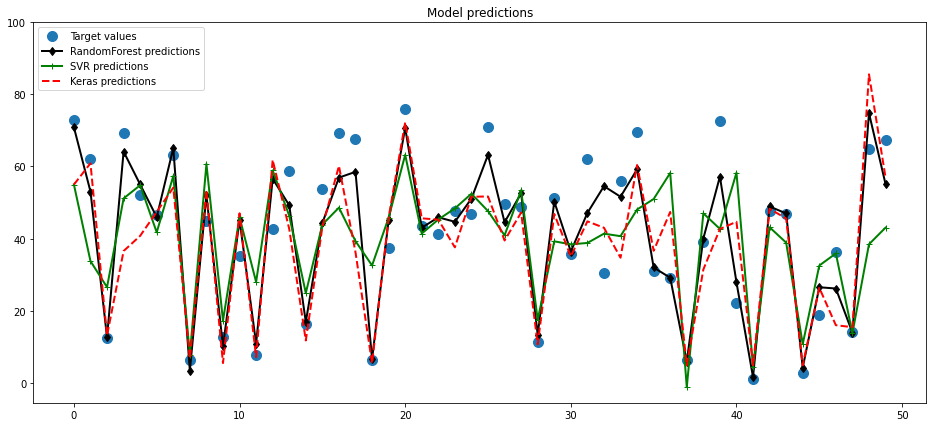

In [20]:
size = 50

rnd_pred = rnd_reg.predict(X_test_scaled)
svm_pred = svm_reg.predict(X_test_scaled)
keras_pred = keras_model.predict(X_test_scaled)

plt.figure(figsize=(16,7))
plt.plot(np.arange(size), y_test[:size], 'o', markersize=10, label='Target values')
plt.plot(np.arange(size), rnd_pred[:size], 'kd-', lw=2, label='RandomForest predictions')
plt.plot(np.arange(size), svm_pred[:size], 'g+-', lw=2, label='SVR predictions')
plt.plot(np.arange(size), keras_pred[:size], 'r--', lw=2, label='Keras predictions')
plt.ylim([None, 100])
plt.title('Model predictions')
plt.legend()
plt.show()

We will also visualize the scatter plot of each model's prediction vs the actual prediction

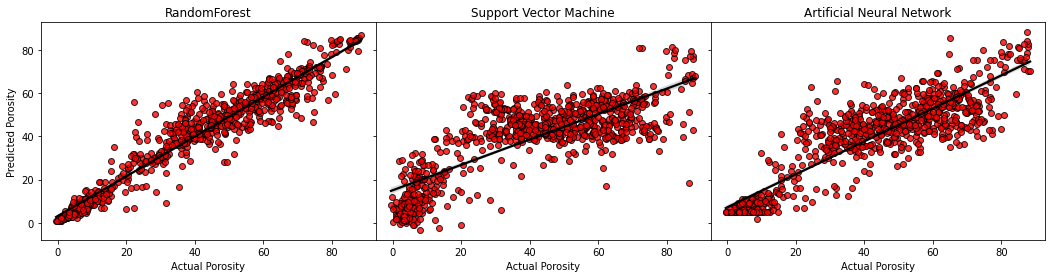

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(18,4), sharey=True)

sns.regplot(x=y_test, y=rnd_pred, ci=95, ax=ax[0], line_kws={'color':'k'}, scatter_kws={'color':'red', 'ec':'k'})
ax[0].set_title("RandomForest")
ax[0].set_xlabel("Actual Porosity")
ax[0].set_ylabel("Predicted Porosity")

sns.regplot(x=y_test, y=svm_pred, ci=95, ax=ax[1], line_kws={'color':'k'}, scatter_kws={'color':'red', 'ec':'k'})
ax[1].set_title("Support Vector Machine")
ax[1].set_xlabel("Actual Porosity")

sns.regplot(x=y_test, y=keras_pred, ci=95, ax=ax[2], line_kws={'color':'k'}, scatter_kws={'color':'red', 'ec':'k'})
ax[2].set_title("Artificial Neural Network")
ax[2].set_xlabel("Actual Porosity")

plt.subplots_adjust(wspace=0)

### Saving and reusing the model

In [22]:
# # Saving the model
# import joblib

# joblib.dump(filename='RandomForest_Porosity_model', value=rnd_reg)


# # Loading the model
# model = joblib.load('RandomForest_Porosity_model')

In [23]:
# # Creating a function to predict porosity

# warnings.filterwarnings('ignore')

# def Predict_Porosity():
#     print("Please enter or paste a list of your log data")
#     values = input()
#     try:
#         values = values.strip('[]').split(',')
#         values = [float(x) for x in values]
#         values = np.array(values).reshape(1,-1)
#         values = scaler.transform(values)
#         prediction = model.predict(values)[0]
#         print(f"\nPorosity is: {prediction:.3f}")
#     except Exception as e:
#         print("\n",str(e),'\n Please check your values again')

In [24]:
# uncomment to use the function

#Predict_Porosity()